In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/Final_dataset2.csv')
df.head()

,Source,Headlines,Category,Link,Date,Author,Target_final,description
0,daily mail zambia,million cbu hall building start,education,https://www.daily-mail.co.zm/2024/10/15/k8-mil...,2024-10-15 06:41:52+00:00,Website Editor,0,mwila ntambi kitwe copperbelt university cbu k...
1,daily mail zambia,exercise aim recruit member province,politics,https://www.daily-mail.co.zm/2024/10/15/exerci...,2024-10-15 06:17:07+00:00,Website Editor,0,melody mupeta kitwe united party national deve...
2,flava fm,charcoal trader chimwemwe township appeal gove...,local news,https://flavaradioandtv.com/charcoal-traders-i...,2024-05-13 08:00:53+00:00,Newsroom,1,group charcoal trader cmml area kitwe chimwemw...
3,flava fm,ecologist warn urbanisation dire impact biodiv...,development,https://flavaradioandtv.com/ecologist-warns-of...,2024-03-26 08:33:05+00:00,Newsroom,1,pecologist mutende simwanza raise alarm detrim...
4,flava fm,copperbelt minister urge mopani settle debt ki...,politics,https://flavaradioandtv.com/copperbelt-ministe...,2024-03-14 10:18:04+00:00,Newsroom,1,pcopperbelt minister elisha matambo issue mopa...


In [ ]:
df.shape

(10811, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10811 entries, 0 to 10810
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Source        10811 non-null  object
 1   Headlines     10811 non-null  object
 2   Category      10811 non-null  object
 3   Link          10811 non-null  object
 4   Date          10811 non-null  object
 5   Author        10811 non-null  object
 6   Target_final  10811 non-null  int64 
 7   description   10811 non-null  object
dtypes: int64(1), object(7)
memory usage: 675.8+ KB


In [ ]:
df.isnull().sum()

,0
Source,0
Headlines,0
Category,0
Link,0
Date,0
Author,0
Target_final,0
description,0


In [ ]:
from prettytable import PrettyTable

def unique_values_summary(df):
    table = PrettyTable()
    table.field_names = ["Column", "Unique Count", "Unique Values"]

    # Loop through each column in the DataFrame
    for column in df.columns:
        unique_vals = df[column].unique()
        unique_count = len(unique_vals)
        # Format unique values as a comma-separated string
        unique_vals_str = ', '.join(map(str, unique_vals[:5]))  # Display only fitoo many
        if unique_count > 5:
            unique_vals_str += "..."

        # Add a row to the table
        table.add_row([column, unique_count, unique_vals_str])

    return table


In [ ]:
print(unique_values_summary(df))

+--------------+--------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

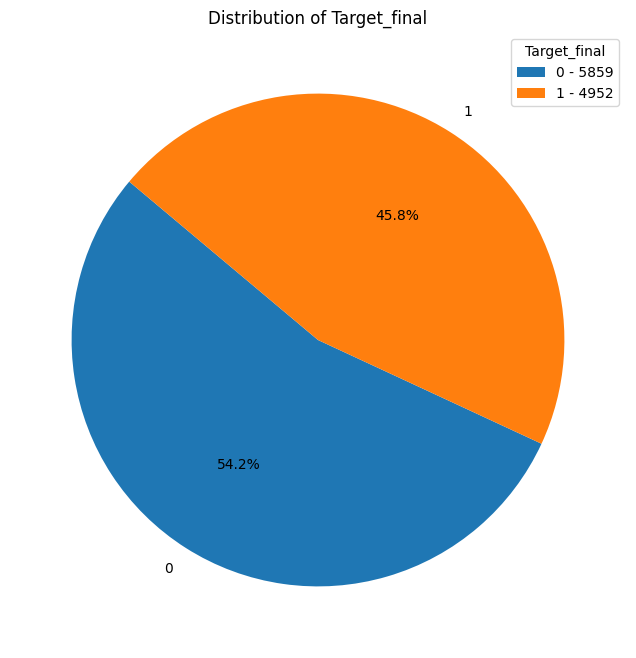

In [ ]:
# Calculate the distribution of Target_final
target_counts = df['Target_final'].value_counts()

# Plotting the distribution of Target_final as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target_final')
plt.legend(title='Target_final', labels=[f'{i} - {target_counts[i]}' for i in target_counts.index], loc="upper right")
plt.show()

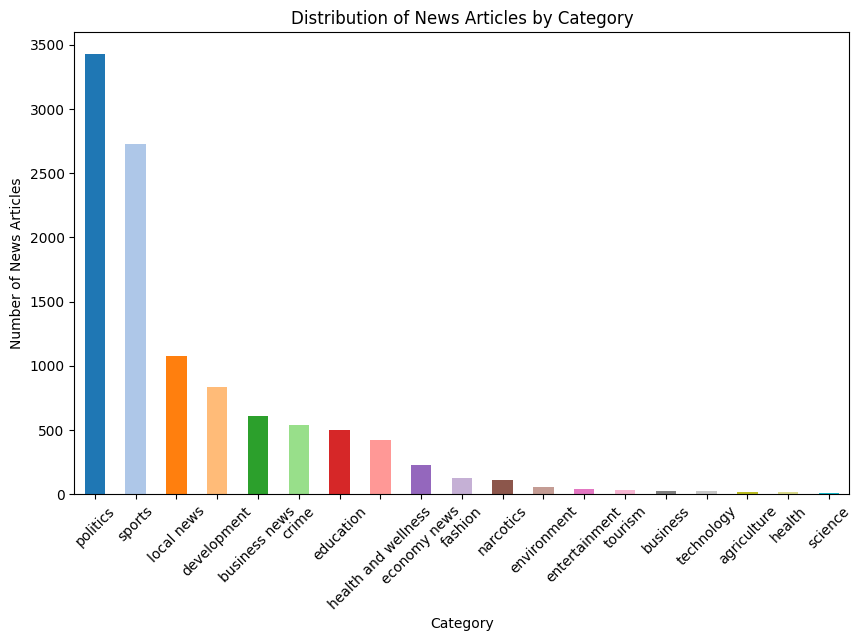

In [ ]:
# Count the number of articles for each category
category_counts = df['Category'].value_counts()

# Set up the color palette for categories
colors = plt.cm.tab20.colors
unique_categories = category_counts.index
category_colors = {category: colors[i % len(colors)] for i, category in enumerate(unique_categories)}

# Plotting the count of articles by category with different colors
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color=[category_colors[cat] for cat in unique_categories])
plt.title('Distribution of News Articles by Category')
plt.xlabel('Category')
plt.ylabel('Number of News Articles')
plt.xticks(rotation=45)
plt.show()

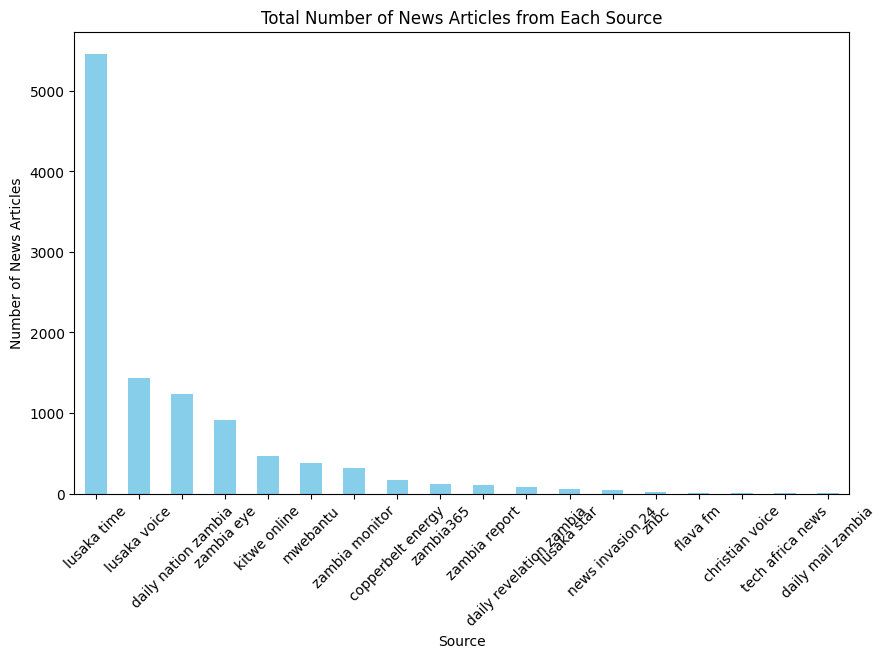

In [ ]:
# Count the number of articles for each source
source_counts = df['Source'].value_counts()

# Plotting the count of news articles by source
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar', color='skyblue')
plt.title('Total Number of News Articles from Each Source')
plt.xlabel('Source')
plt.ylabel('Number of News Articles')
plt.xticks(rotation=45)
plt.show()

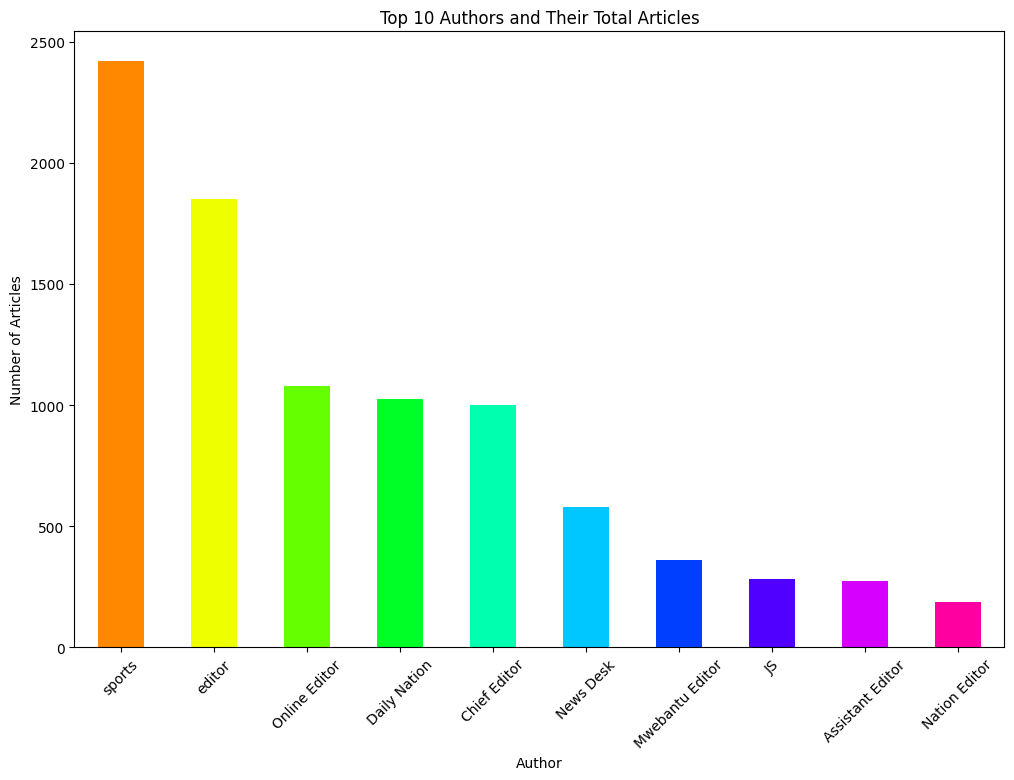

In [ ]:
# Count the number of articles for each author
author_counts = df['Author'].value_counts().head(10)  # Top 10 authors

# Prepare the color palette
# Using seaborn for a distinct color palette
colors = sns.color_palette("hsv", len(author_counts))

# Plotting the top 10 authors by total articles
plt.figure(figsize=(12, 8))
author_counts.plot(kind='bar', color=colors)
plt.title('Top 10 Authors and Their Total Articles')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Converting Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


df['Month'] = df['Date'].dt.strftime('%b')
df['Year'] = df['Date'].dt.year

In [ ]:
df.head(2)

,Source,Headlines,Category,Link,Date,Author,Target_final,description,Month,Year
0,daily mail zambia,million cbu hall building start,education,https://www.daily-mail.co.zm/2024/10/15/k8-mil...,2024-10-15 06:41:52+00:00,Website Editor,0,mwila ntambi kitwe copperbelt university cbu k...,Oct,2024
1,daily mail zambia,exercise aim recruit member province,politics,https://www.daily-mail.co.zm/2024/10/15/exerci...,2024-10-15 06:17:07+00:00,Website Editor,0,melody mupeta kitwe united party national deve...,Oct,2024


In [ ]:
df['Year'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014,
       2013, 2012, 2011, 2010, 2009, 2008, 2007, 1970], dtype=int32)

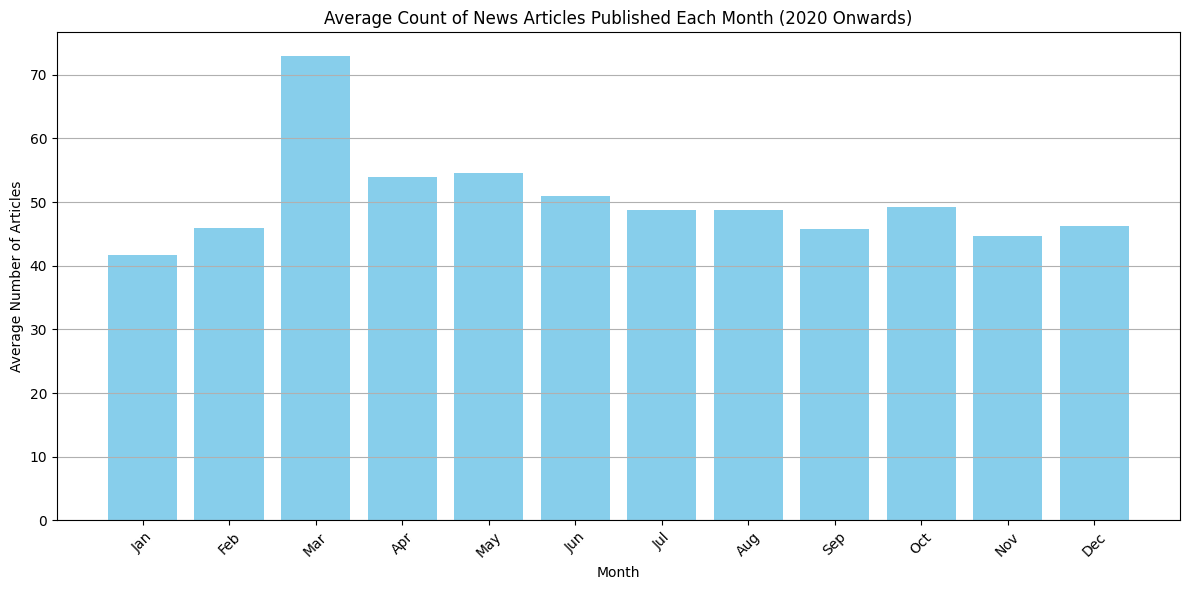

In [ ]:
filtered_df = df[df['Year'] >= 1970]

# Group by Year and Month, then count the number of articles
monthly_counts = filtered_df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Calculate average monthly counts
average_monthly_counts = monthly_counts.groupby('Month')['Count'].mean().reset_index()

# Sort the months for better visualization
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  # Use abbreviated month names
average_monthly_counts['Month'] = pd.Categorical(average_monthly_counts['Month'], categories=month_order, ordered=True)
average_monthly_counts = average_monthly_counts.sort_values('Month')

# Formatting the plot
plt.figure(figsize=(12, 6))
plt.bar(average_monthly_counts['Month'], average_monthly_counts['Count'], color='skyblue')
plt.title('Average Count of News Articles Published Each Month (2020 Onwards)')
plt.xlabel('Month')
plt.ylabel('Average Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

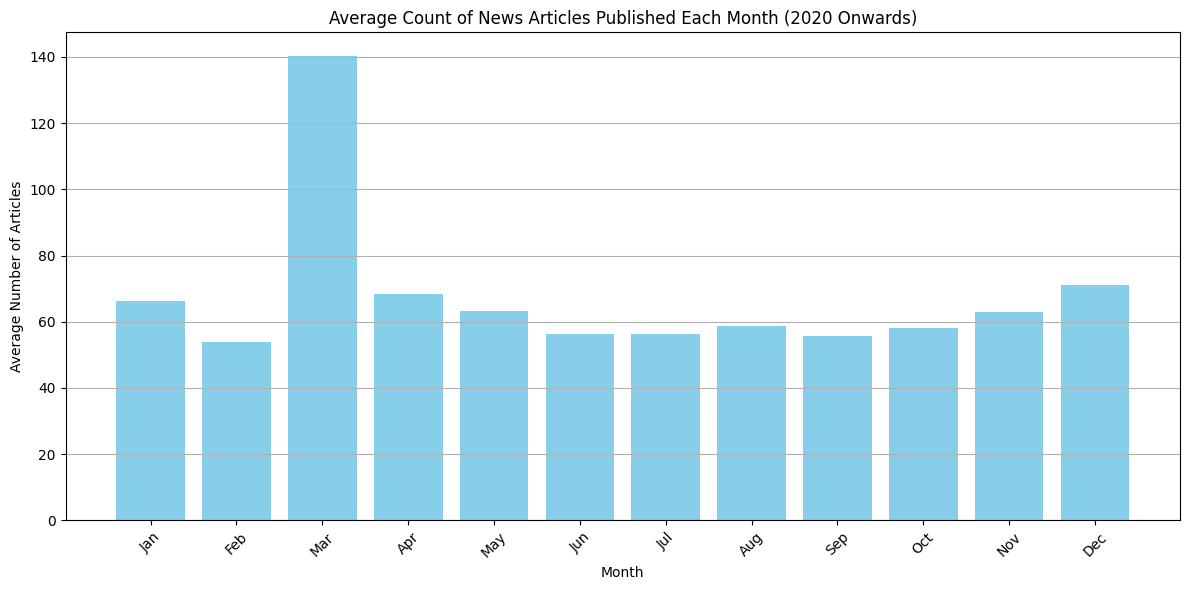

In [ ]:
filtered_df = df[df['Year'] >= 2020]

# Group by Year and Month, then count the number of articles
monthly_counts = filtered_df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Calculate average monthly counts
average_monthly_counts = monthly_counts.groupby('Month')['Count'].mean().reset_index()

# Sort the months for better visualization
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  # Use abbreviated month names
average_monthly_counts['Month'] = pd.Categorical(average_monthly_counts['Month'], categories=month_order, ordered=True)
average_monthly_counts = average_monthly_counts.sort_values('Month')

# Formatting the plot
plt.figure(figsize=(12, 6))
plt.bar(average_monthly_counts['Month'], average_monthly_counts['Count'], color='skyblue')
plt.title('Average Count of News Articles Published Each Month (2020 Onwards)')
plt.xlabel('Month')
plt.ylabel('Average Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()